In [1]:
# Correctly defining the file path and loading the dataset
import pandas as pd

file_path = 'ckd.csv'

try:
    ckd_data = pd.read_csv(file_path)
    data_head = ckd_data.head()
except Exception as e:
    data_head = str(e)

data_head


,Unnamed: 0,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,0,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,1,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,2,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,3,68,80,1.010,3,2,normal,abnormal,present,present,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,4,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 1: Preprocessing the data
# Selecting relevant features for simplicity (assuming Haemoglobin and Glucose are relevant)
# Also including the 'Class' column which is the target
relevant_columns = ['Hemoglobin', 'Blood Glucose Random', 'Class']  # Assuming these are the correct column names
ckd_relevant_data = ckd_data[relevant_columns].dropna()  # Dropping rows with missing values for simplicity

# Splitting data into features (X) and target (y)
X = ckd_relevant_data[['Hemoglobin', 'Blood Glucose Random']]
y = ckd_relevant_data['Class']

# Normalizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Train a KNN model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 3: Calculate average and standard deviation for Haemoglobin and Glucose
mean_Hemoglobin = X['Hemoglobin'].mean()
std_Hemoglobin = X['Hemoglobin'].std()
mean_glucose = X['Blood Glucose Random'].mean()
std_glucose = X['Blood Glucose Random'].std()

# Step 4: Create Alice's data point
alice_Hemoglobin = mean_Hemoglobin + 0 * std_Hemoglobin  # Haemoglobin is 0 standard deviations from the mean
alice_glucose = mean_glucose + 1.1 * std_glucose  # Glucose is 1.1 standard deviations above the mean
alice_data = scaler.transform([[alice_Hemoglobin, alice_glucose]])

# Step 5: Predict if Alice is likely to have CKD
alice_prediction = knn.predict(alice_data)
alice_prediction[0]  # The predicted class for Alice



C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Load the breast cancer dataset
file_path = 'breast-cancer.csv'
breast_cancer_data = pd.read_csv(file_path)

# Identify non-numeric columns and convert them to numeric
# Assuming that columns with non-numeric values are categorical
breast_cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Checking the column names of the dataset
column_names = breast_cancer_data.columns
column_names.tolist()


['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32']

Performance for Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        71
           1       0.93      0.88      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

---------------
Performance for Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        71
           1       0.91      0.95      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114

---------------
Performance for SVM:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        71
           1       0.90      0.88      0.89        43

    accuracy                           0.92       114
   macr

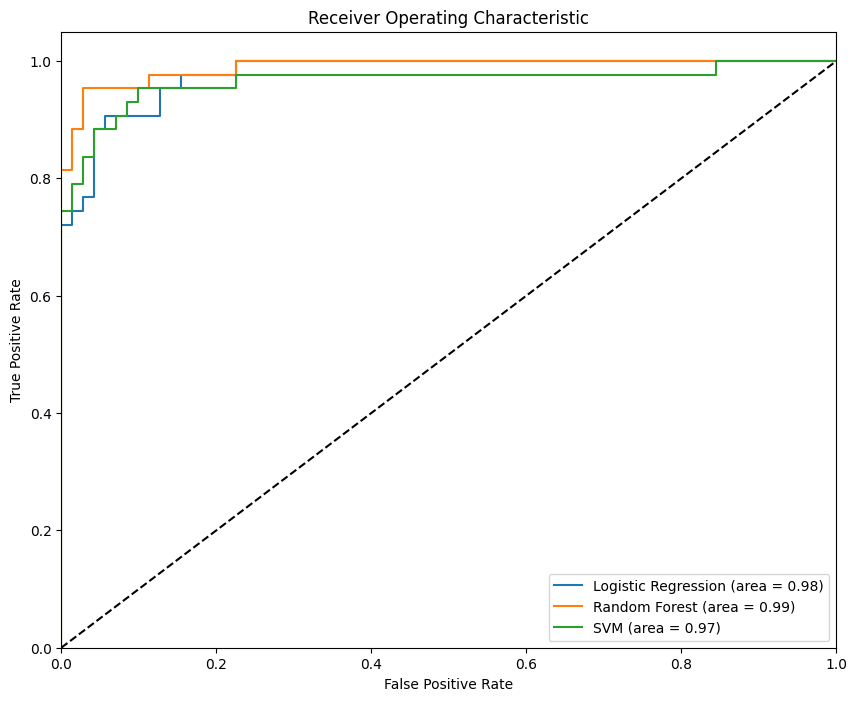

In [5]:
label_encoders = {}
for column in breast_cancer_data.columns:
    if breast_cancer_data[column].dtype == object:
        le = LabelEncoder()
        breast_cancer_data[column] = le.fit_transform(breast_cancer_data[column])
        label_encoders[column] = le

# Splitting the dataset into features and target
# Assuming 'diagnosis' is the target variable and you want to use specific columns as features
target_column = 'diagnosis'
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean']  # Add more features if needed

# Creating the feature matrix (X) and the target vector (y)
X = breast_cancer_data[selected_features]
y = breast_cancer_data[target_column]


# Normalizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Classifier models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initializing models
logreg = LogisticRegression()
rf = RandomForestClassifier()
svm = SVC(probability=True)

# Training models
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predictions and performance measures
models = [logreg, rf, svm]
model_names = ['Logistic Regression', 'Random Forest', 'SVM']
roc_data = []

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] # Probability for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    roc_data.append((fpr, tpr, roc_auc, name))

    print(f"Performance for {name}:")
    print(classification_report(y_test, y_pred))
    print("---------------")

# Plotting ROC Curves
plt.figure(figsize=(10, 8))
for data in roc_data:
    plt.plot(data[0], data[1], label=f'{data[3]} (area = {data[2]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


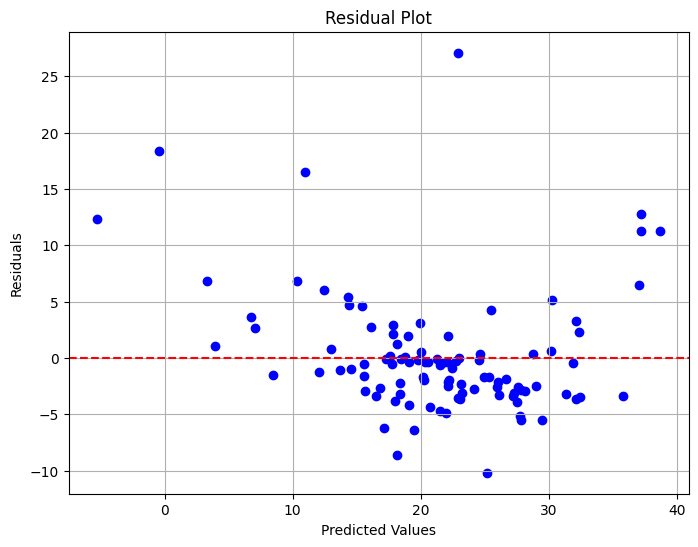

Coefficients:
crime_rate: -0.10130100253064786
pprime_land: -0.0953968821561888
Luxury: 3.5182495897801296
Rooms: 5.115967108398448
age: -0.026760432021571953
Central_location: -1.0682062100080414
Highways: 0.06348404719918052
Tax_rate: -0.009218458446313901
poor_percentage: -0.5579853040331048

Model Summary:
                            OLS Regression Results                            
Dep. Variable:             home_price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     102.3
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           2.22e-97
Time:                        08:40:42   Log-Likelihood:                -1231.7
No. Observations:                 404   AIC:                             2483.
Df Residuals:                     394   BIC:                             2523.
Df Model:                           9                   

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Load the dataset
file_path = 'house.csv'
data = pd.read_csv(file_path)

# Create a DataFrame from the sample data


# Define the features (X) and target (y)
X = data.drop(columns=['home_price'])
y = data['home_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plot the residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, c='b', marker='o')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

# Print the coefficients of the linear regression model
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")

# Print model summary using statsmodels
X_train = sm.add_constant(X_train)  # Add a constant (intercept) term
model_summary = sm.OLS(y_train, X_train).fit()
print("\nModel Summary:")
print(model_summary.summary())
